In [141]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,GRU
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tensorflow.keras import optimizers, Model
import matplotlib.pyplot as plt
import math

# Load Data

In [142]:
df=pd.read_excel("datalagrev.xlsx")
# Data yang digunakan yaitu Harga cabai Rawit dan Harga Bawang putih sebagai Barang Subtitusi Sudah dilakukan lag - 1 Minggu

In [143]:
df

,Tanggal,Harga Bawang Putih,Harga Cabai Merah,Harga Cabai Rawit
0,01/ 01/ 2018,17050.0,31500.0,22150.0
1,08/ 01/ 2018,17300.0,32450.0,28550.0
2,15/ 01/ 2018,18050.0,34000.0,33650.0
3,22/ 01/ 2018,18550.0,31700.0,33800.0
4,29/ 01/ 2018,18050.0,29550.0,35950.0
...,...,...,...,...
309,04/ 12/ 2023,32850.0,75150.0,68950.0
310,11/ 12/ 2023,32750.0,85500.0,68800.0
311,18/ 12/ 2023,32750.0,80200.0,67550.0
312,25/ 12/ 2023,33400.0,62050.0,61200.0


# Statistical Analytics

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tanggal             314 non-null    object 
 1   Harga Bawang Putih  313 non-null    float64
 2   Harga Cabai Merah   313 non-null    float64
 3   Harga Cabai Rawit   313 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB


In [145]:
df.shape

(314, 4)


Statistik Deskriptif Harga:
count      313.000000
mean     34189.297125
std      14091.005342
min      15300.000000
25%      24200.000000
50%      31750.000000
75%      39200.000000
max      95250.000000
Name: Harga Cabai Merah, dtype: float64


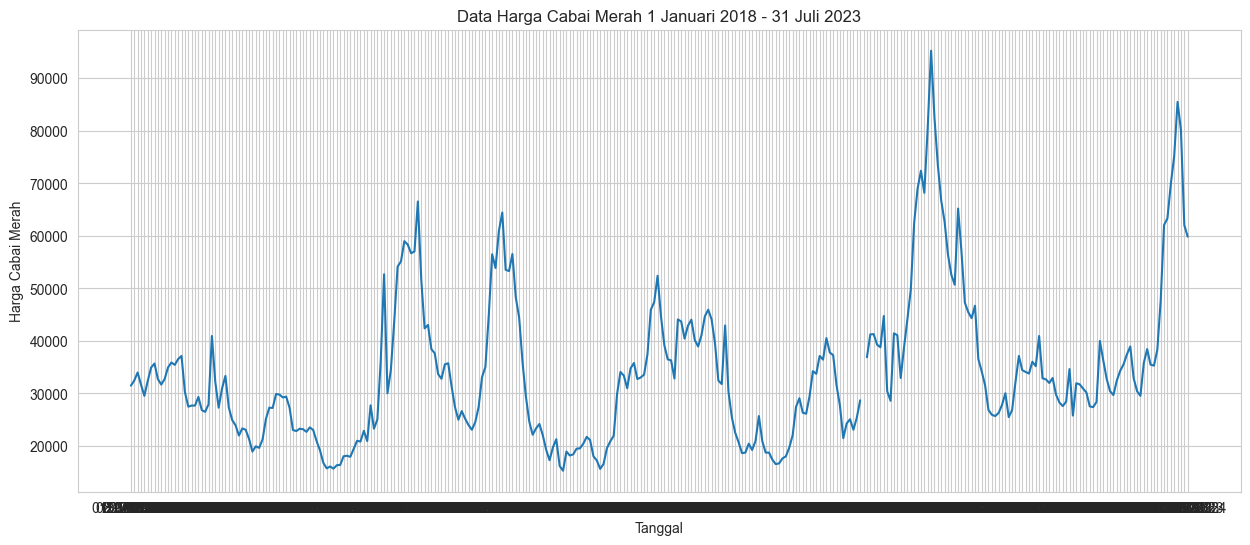

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
harga_stats = df['Harga Cabai Merah'].describe()
print("\nStatistik Deskriptif Harga:")
print(harga_stats)
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'], df['Harga Cabai Merah'])
plt.title('Data Harga Cabai Merah 1 Januari 2018 - 31 Juli 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Merah')
plt.show()

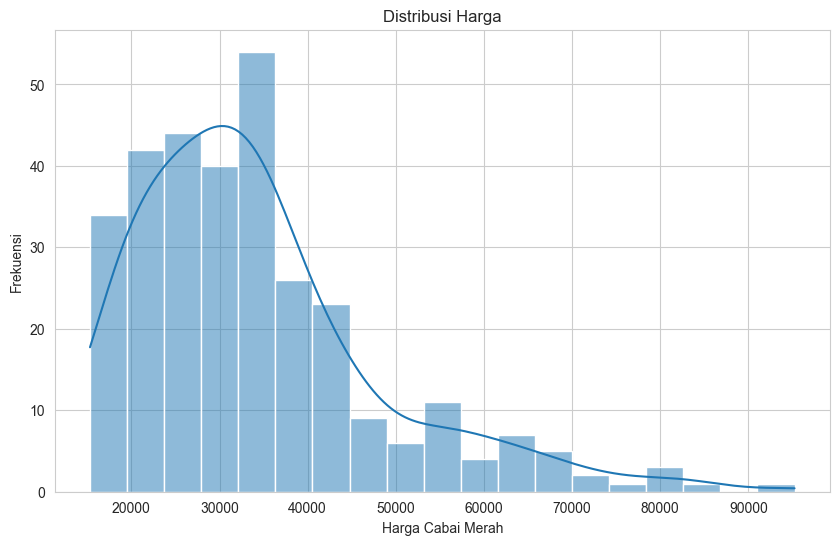

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga Cabai Merah'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga Cabai Merah')
plt.ylabel('Frekuensi')
plt.show()

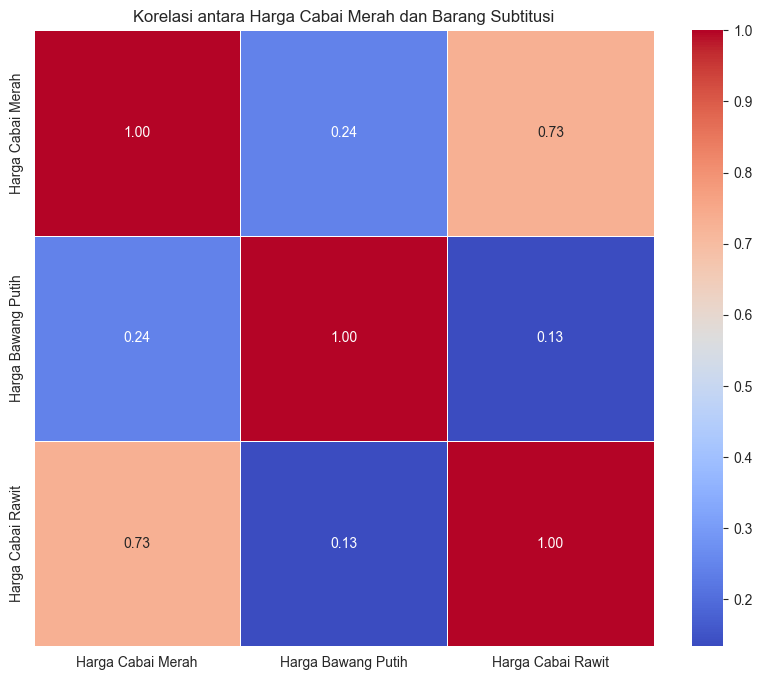

In [148]:
corr_with_target = df[['Harga Cabai Merah','Harga Bawang Putih','Harga Cabai Rawit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Harga Cabai Merah dan Barang Subtitusi')
plt.show()

In [149]:
df.describe()

,Harga Bawang Putih,Harga Cabai Merah,Harga Cabai Rawit
count,313.000000,313.000000,313.000000
mean,25330.830671,34189.297125,36245.207668
std,6197.284089,14091.005342,16000.777506
min,15800.000000,15300.000000,16700.000000
25%,21750.000000,24200.000000,23250.000000
50%,23700.000000,31750.000000,32250.000000
75%,27400.000000,39200.000000,43300.000000
max,52950.000000,95250.000000,89150.000000


# Preprocessing Data


In [150]:
df['Harga Cabai Merah'] = df['Harga Cabai Merah'].astype('float64')
df['Harga Bawang Putih'] = df['Harga Bawang Putih'].astype('float64')
df['Harga Cabai Rawit'] = df['Harga Cabai Rawit'].astype('float64')

In [151]:
df.isnull().sum()

Tanggal               0
Harga Bawang Putih    1
Harga Cabai Merah     1
Harga Cabai Rawit     1
dtype: int64

In [152]:
df = df.fillna(df.mean())

C:\Users\ihsan\AppData\Local\Temp\ipykernel_14408\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [153]:
scaler_rr = MinMaxScaler(feature_range=(0, 1))
scaler_harga = MinMaxScaler(feature_range=(0, 1))
df['Harga Cabai Merah_Scaled'] = scaler_harga.fit_transform(df[['Harga Cabai Merah']])
df['Harga Bawang Putih_Scaled'] = scaler_rr.fit_transform(df[['Harga Bawang Putih']])
df['Harga Cabai Rawit_Scaled'] = scaler_rr.fit_transform(df[['Harga Cabai Rawit']])

In [154]:
df

,Tanggal,Harga Bawang Putih,Harga Cabai Merah,Harga Cabai Rawit,Harga Cabai Merah_Scaled,Harga Bawang Putih_Scaled,Harga Cabai Rawit_Scaled
0,01/ 01/ 2018,17050.0,31500.0,22150.0,0.202627,0.033647,0.075224
1,08/ 01/ 2018,17300.0,32450.0,28550.0,0.214509,0.040377,0.163561
2,15/ 01/ 2018,18050.0,34000.0,33650.0,0.233896,0.060565,0.233954
3,22/ 01/ 2018,18550.0,31700.0,33800.0,0.205128,0.074024,0.236025
4,29/ 01/ 2018,18050.0,29550.0,35950.0,0.178236,0.060565,0.265700
...,...,...,...,...,...,...,...
309,04/ 12/ 2023,32850.0,75150.0,68950.0,0.748593,0.458950,0.721187
310,11/ 12/ 2023,32750.0,85500.0,68800.0,0.878049,0.456258,0.719117
311,18/ 12/ 2023,32750.0,80200.0,67550.0,0.811757,0.456258,0.701863
312,25/ 12/ 2023,33400.0,62050.0,61200.0,0.584740,0.473755,0.614217


# Split Data

In [155]:
selected_columns = ['Harga Cabai Merah_Scaled','Harga Bawang Putih_Scaled','Harga Cabai Rawit_Scaled']
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)][selected_columns].values
        dataX.append(a)
        dataY.append(dataset[i + look_back:i + look_back + 1]['Harga Cabai Merah_Scaled'].values)
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], len(selected_columns)))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], len(selected_columns)))

# Pembuatan Model

In [156]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 3), activation='relu'))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=60, batch_size=64, verbose=2)


Epoch 1/60
4/4 - 3s - loss: 0.0807 - 3s/epoch - 778ms/step
Epoch 2/60
4/4 - 0s - loss: 0.0756 - 16ms/epoch - 4ms/step
Epoch 3/60
4/4 - 0s - loss: 0.0708 - 15ms/epoch - 4ms/step
Epoch 4/60
4/4 - 0s - loss: 0.0660 - 16ms/epoch - 4ms/step
Epoch 5/60
4/4 - 0s - loss: 0.0610 - 16ms/epoch - 4ms/step
Epoch 6/60
4/4 - 0s - loss: 0.0558 - 15ms/epoch - 4ms/step
Epoch 7/60
4/4 - 0s - loss: 0.0504 - 17ms/epoch - 4ms/step
Epoch 8/60
4/4 - 0s - loss: 0.0456 - 25ms/epoch - 6ms/step
Epoch 9/60
4/4 - 0s - loss: 0.0400 - 20ms/epoch - 5ms/step
Epoch 10/60
4/4 - 0s - loss: 0.0352 - 18ms/epoch - 4ms/step
Epoch 11/60
4/4 - 0s - loss: 0.0310 - 19ms/epoch - 5ms/step
Epoch 12/60
4/4 - 0s - loss: 0.0270 - 18ms/epoch - 5ms/step
Epoch 13/60
4/4 - 0s - loss: 0.0240 - 18ms/epoch - 5ms/step
Epoch 14/60
4/4 - 0s - loss: 0.0221 - 16ms/epoch - 4ms/step
Epoch 15/60
4/4 - 0s - loss: 0.0210 - 16ms/epoch - 4ms/step
Epoch 16/60
4/4 - 0s - loss: 0.0213 - 18ms/epoch - 5ms/step
Epoch 17/60
4/4 - 0s - loss: 0.0211 - 21ms/epoch 

In [157]:
predictions = model.predict(testX)
predictions = scaler_harga.inverse_transform(predictions)
testY = scaler_harga.inverse_transform(testY)

2/2 [==============================] - 0s 4ms/step


In [158]:
trainY = scaler_harga.inverse_transform(trainY)

In [159]:
df_test = pd.DataFrame({'Actual': np.squeeze(testY), 'Predicted': np.squeeze(predictions)})
print(df_test)

     Actual     Predicted
0   34200.0  34568.304688
1   31550.0  32398.148438
2   26850.0  30246.392578
3   25950.0  26916.671875
4   25700.0  26264.035156
..      ...           ...
57  75150.0  69184.531250
58  85500.0  76051.046875
59  80200.0  87916.593750
60  62050.0  81548.960938
61  59850.0  60917.117188

[62 rows x 2 columns]


# Hasil Akhir

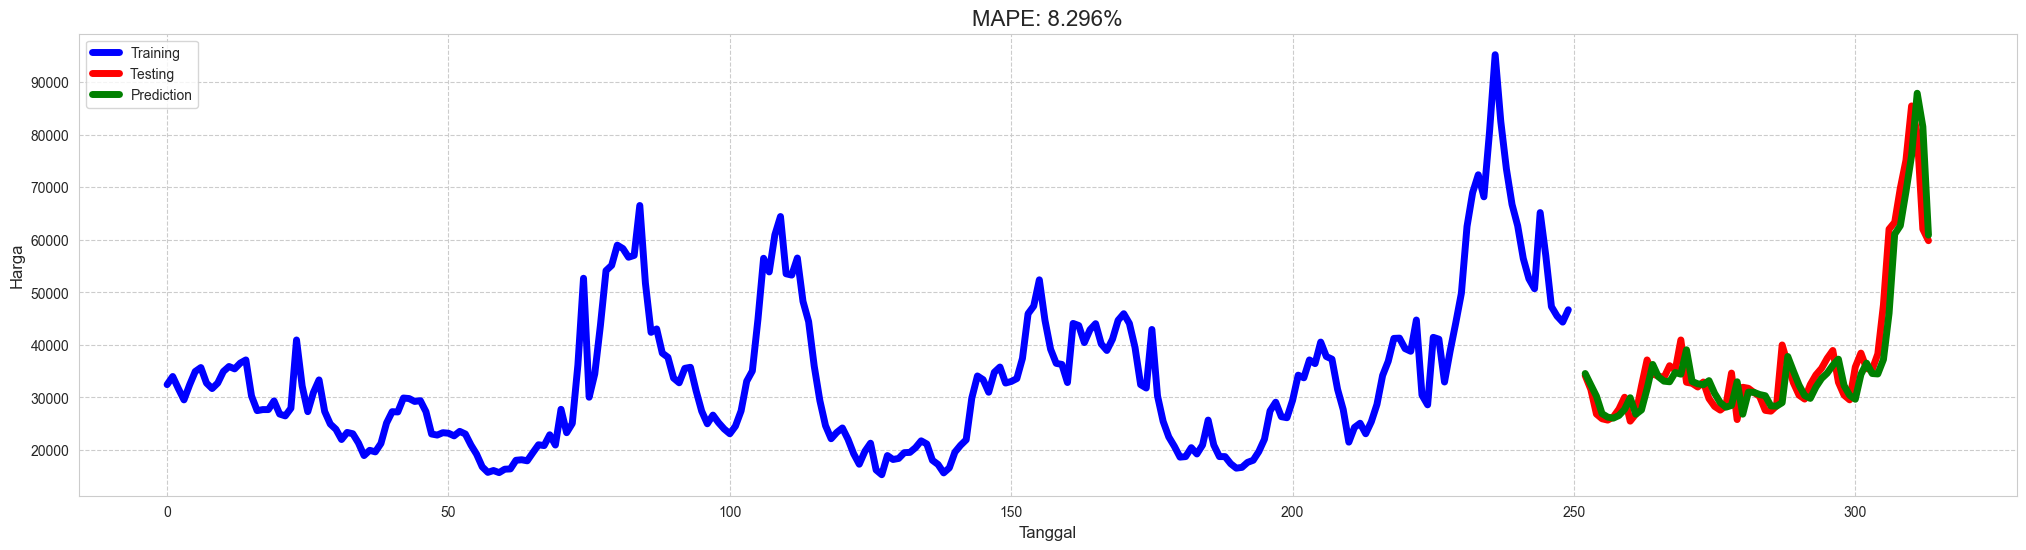

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(testY, predictions)*100
plt.figure(figsize=(25, 6))
plt.plot(df.index[:len(trainY)], trainY, label='Training', marker='', color='blue', linestyle='-', linewidth=5)
plt.plot(df.index[-len(testY):], testY, label='Testing ', marker='', color='red', linestyle='-', linewidth=5)
plt.plot(df.index[-len(predictions):], predictions, label='Prediction', marker='', color='green', linestyle='-', linewidth=5)
plt.title(f'MAPE: {mape:.3f}%', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(True, linestyle='--', alpha=1)
plt.legend()
plt.xticks(rotation=0)
plt.show()